# DataTrained Practise Project 2
## 2. Abalone Case Study

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from inspect import signature

import sklearn
from sklearn import linear_model,dummy,metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [3]:
# let's fetch dataset
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


We've 4177 rows and 9 columns,seems like we've less columns means less features.Let's proceed

In [4]:
# print 1st five rows
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


here are 1st five rows.

In [5]:
df.shape

(4177, 9)

In [6]:
# let's get some info
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


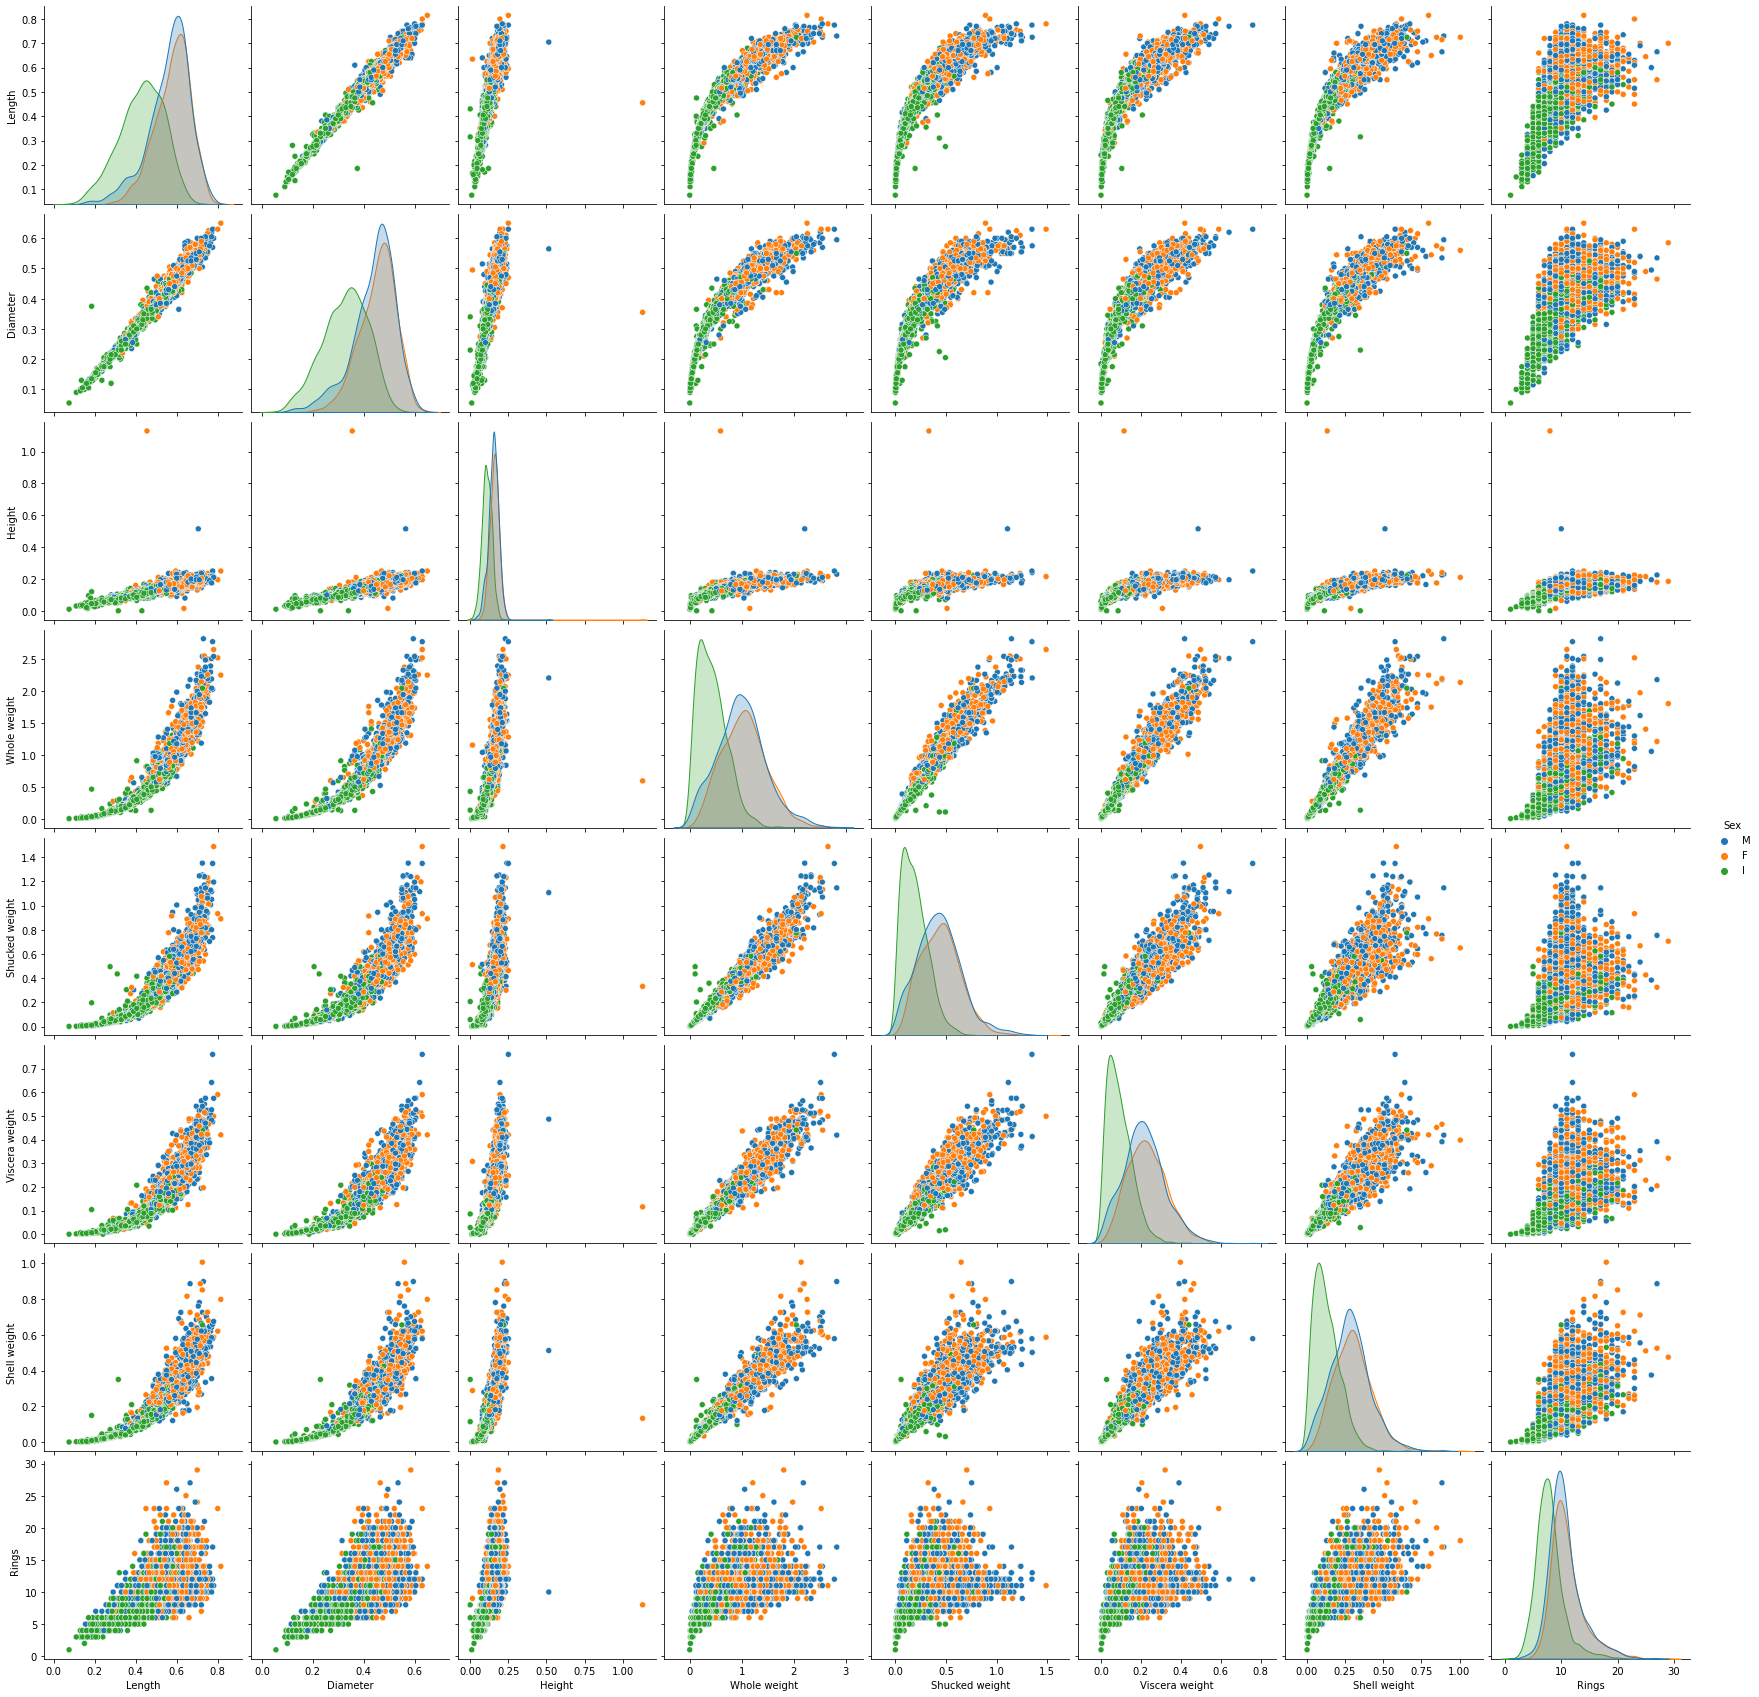

In [13]:
# let's see distribution of data
sns.set_style()
sns.pairplot(df,hue='Sex',size=3)
plt.show()

In [14]:
# Let's split feature and label from given dataset.
X = df.drop(columns='Sex')
y = df['Sex']

In [15]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
y

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

Hence the data has been splited.

In [19]:
# the test set will be 30% OF Dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

data has been divided into.

In [22]:
# let's see count of label
y_test.value_counts()

M    458
I    419
F    377
Name: Sex, dtype: int64

So, we have M-458, I-419, F-377

In [24]:
# class proportionals
y_test.value_counts()/len(y_test)

M    0.365231
I    0.334131
F    0.300638
Name: Sex, dtype: float64

In [27]:
# build the logistic Regression model
lr = LogisticRegression(solver='liblinear',fit_intercept=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred_p = lr.predict_proba(X_test)

In [28]:
# build dummy classifieer that predicts each observation to be the most frequent class
dummy = DummyClassifier(strategy = 'most_frequent')
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_p = dumb.predict_proba(X_test)

In [30]:
# test accracy of  both the model
print(lr.score(X_test,y_test))
print(dumb.score(dumb_pred,y_test))

0.5685805422647527
0.3652312599681021


we got lr score is 56.85% and dumb score is 36.52%

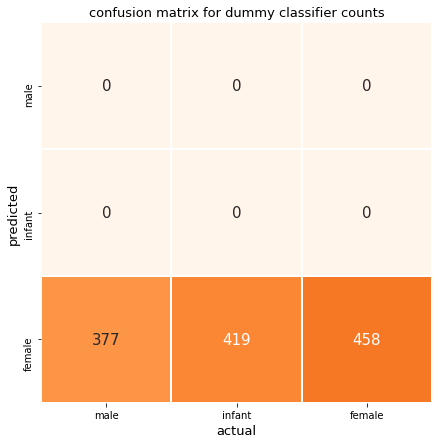

In [34]:
# generate confusion matrix for dummy classifier
cm_dummy = confusion_matrix(y_test,dumb_pred)
cm_dummy_df = pd.DataFrame(cm_dummy)

# lets see it in heatmap
fig, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={'size':15},cmap='Oranges', vmin=0,vmax=800, fmt='.0f', linewidth=1, linecolor='white',
           cbar=False, xticklabels=['male','infant','female'], yticklabels=['male','infant','female'])
plt.ylabel('predicted',fontsize=13)
plt.xlabel('actual',fontsize=13)
plt.title('confusion matrix for dummy classifier counts',fontsize=13)
plt.show()

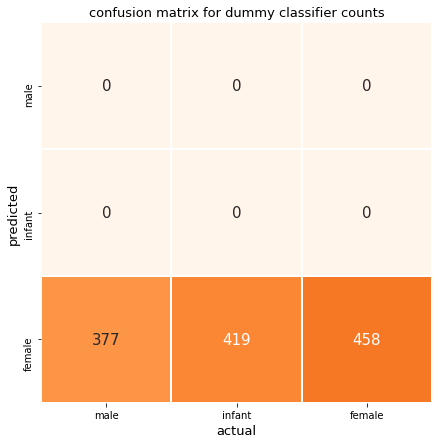

In [35]:
# generate confusion matrix
cm_logis = confusion_matrix(y_test,y_pred)
# put it into dataframe
pd.DataFrame(cm_logis)

fig, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={'size':15},cmap='Oranges', vmin=0,vmax=800, fmt='.0f', linewidth=1, linecolor='white',
           cbar=False, xticklabels=['male','infant','female'], yticklabels=['male','infant','female'])
plt.ylabel('predicted',fontsize=13)
plt.xlabel('actual',fontsize=13)
plt.title('confusion matrix for dummy classifier counts',fontsize=13)
plt.show()

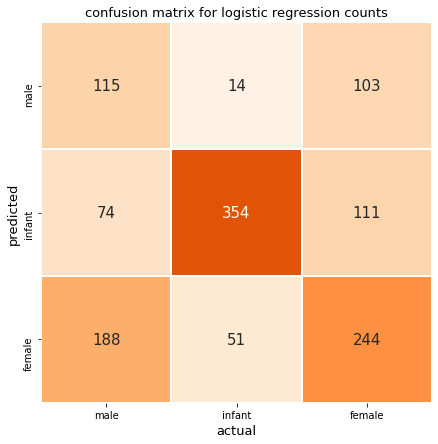

In [38]:
# generate confusion matrix
cm_logis = confusion_matrix(y_test,y_pred)
# put it into dataframe
cm_logis_df = pd.DataFrame(cm_logis)

fig, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm_logis_df.T, annot=True, annot_kws={'size':15},cmap='Oranges', vmin=0,vmax=500, fmt='.0f', linewidth=1, linecolor='white',
           cbar=False, xticklabels=['male','infant','female'], yticklabels=['male','infant','female'])
plt.ylabel('predicted',fontsize=13)
plt.xlabel('actual',fontsize=13)
plt.title('confusion matrix for logistic regression counts',fontsize=13)
plt.show()

In [41]:
y_predict = lr.predict(X_test)
print('accuracy=',lr.score(X_test,y_test))

accuracy= 0.5685805422647527


so we got accuracy 56.85%